<a href="https://colab.research.google.com/github/ateachment/Moodle-KI/blob/main/SimpleWordEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vocabulary:
['the', 'cat', 'dog', 'meows', 'barks']

Test sentences with one hot encodings:

the cat =>  [1,1,0]

the dog => [1,0,1]

Output [1,1,0,1,0], [1,0,1,0,1]



Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 0.5999
Epoch 2/200
1/1 [==============================] - 0s 18ms/step - loss: 0.5385
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 0.4865
Epoch 4/200
1/1 [==============================] - 0s 9ms/step - loss: 0.4424
Epoch 5/200
1/1 [==============================] - 0s 9ms/step - loss: 0.4052
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 0.3736
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 0.3469
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 0.3243
Epoch 9/200
1/1 [==============================] - 0s 12ms/step - loss: 0.3052
Epoch 10/200
1/1 [==============================] - 0s 12ms/step - loss: 0.2890
Epoch 11/200
1/1 [==============================] - 0s 12ms/step - loss: 0.2753
Epoch 12/200
1/1 [==============================] - 0s 12ms/step - loss: 0.2637
Epoch 13/200
1/1 [==============================] - 0s 

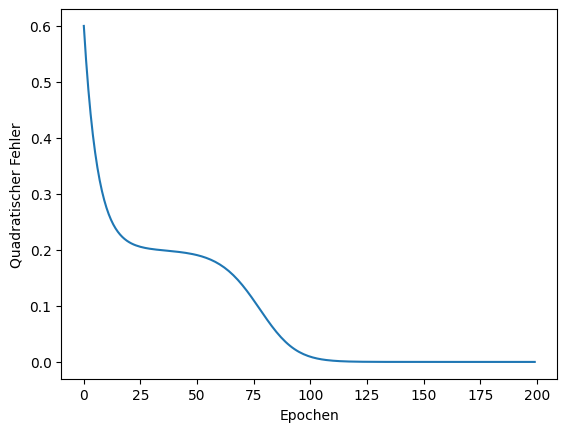

1/1 [==============================] - 0s 77ms/step
Prediction for 'the cat meows:'
[[ 9.9995220e-01  9.9994516e-01 -1.1533499e-05  9.9997258e-01
   6.4641237e-05]]
Weights for ['the', 'cat', 'dog'] represent 'word embeddings'
[[ 0.00582719 -0.50082475  0.51814336]
 [-0.00413838 -0.7001615   0.69884676]]


In [71]:
import tensorflow as tf
import numpy as np
import os.path
import matplotlib.pyplot as plt

# Initialization of the weights close to 0 before training, for better interpretability of the final trained weights, which represent the word embeddings.
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=0.01)

# Callback to collect and plot the error values for each epoch
class PlotCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.losses = []
        super().__init__()

    def on_epoch_end(self, epoch, logs=None):
        loss = logs['loss']
        self.losses.append(loss)

    def on_train_end(self, logs=None):
        plt.plot(self.losses)
        plt.xlabel('Epochen')
        plt.ylabel('Quadratischer Fehler')
        plt.show()

EPOCHS = 200 # Number of training runs (iterations)

model = tf.keras.models.Sequential((
    tf.keras.layers.Input((3,)), # Input layer with dimension 3: (3,)
    tf.keras.layers.Dense(2, activation=tf.keras.activations.tanh, kernel_initializer=initializer), # Hidden layer (2 neurons) with activation function
    tf.keras.layers.Dense(5, kernel_initializer=initializer) # Output layer (5 neurons)
))


x_train = np.array([[1,1,0], [1,0,1]]) # NumPy arrays significantly speed up the learning process
y_train = np.array([[1,1,0,1,0], [1,0,1,0,1]])

model.compile(loss=tf.losses.mean_squared_error, # loss (loss-function): function for calculating the error
              optimizer=tf.optimizers.SGD(learning_rate=0.2)) # optimizer: function for adjusting the weights (SGD = Stochastic gradient descent)

model.fit(x_train, # Inputs
          y_train, # expected outputs
          epochs=EPOCHS, # numbers of iterations
          callbacks=[PlotCallback()]) # Callback für plotting

pred = model.predict([[1, 1, 0]])

print("Prediction for 'the cat meows:'")
print(pred)

print("Weights for ['the', 'cat', 'dog'] represent 'word embeddings'")
print(model.layers[0].get_weights()[0].T)

